
--- Scenario 1: No SRM, Actual Ratio (A/(A+B)): 0.5000 ---
Scenario 1: No SRM
                  Metric         Value
0      Conversion Rate A        0.1028
1      Conversion Rate B        0.1220
2   P-value (Chi-Square)        1.0000
3  Sample Ratio Mismatch  Not Detected


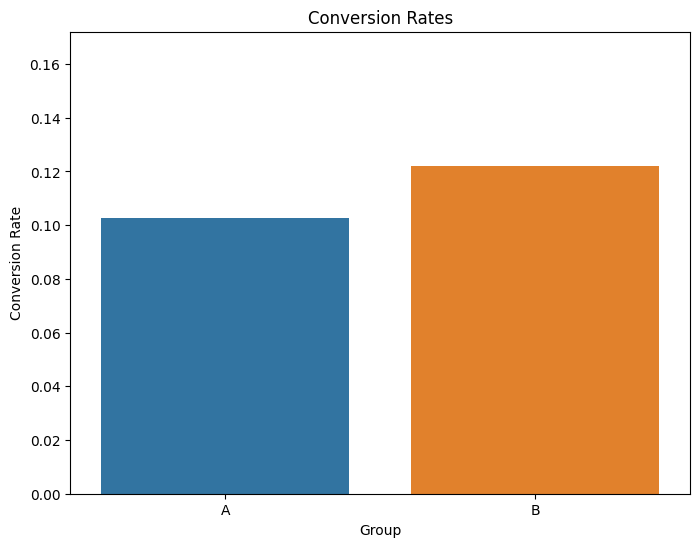

No significant Sample Ratio Mismatch detected.

--- Scenario 2: SRM, Group A Higher, Actual Ratio (A/(A+B)): 0.6000 ---
Scenario 2: SRM - Group A Higher
                  Metric     Value
0      Conversion Rate A    0.1063
1      Conversion Rate B    0.1187
2   P-value (Chi-Square)    0.0000
3  Sample Ratio Mismatch  Detected


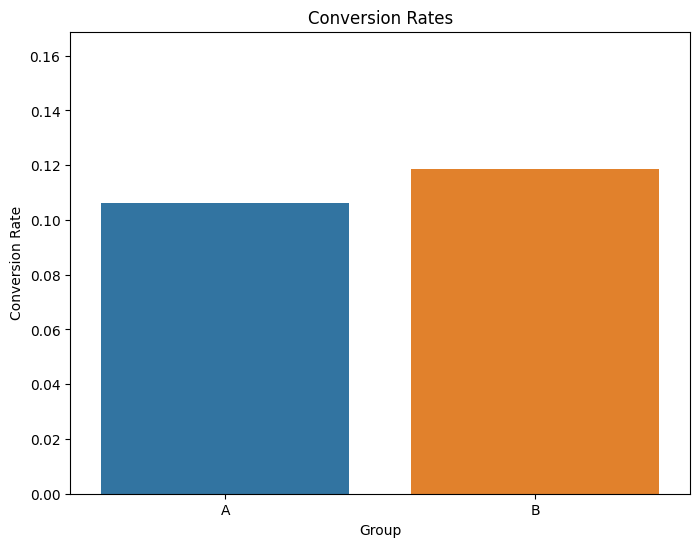

Sample Ratio Mismatch Detected!

--- Scenario 3: SRM, Group B Higher, Actual Ratio (A/(A+B)): 0.4000 ---
Scenario 3: SRM - Group B Higher
                  Metric     Value
0      Conversion Rate A    0.0958
1      Conversion Rate B    0.1213
2   P-value (Chi-Square)    0.0000
3  Sample Ratio Mismatch  Detected


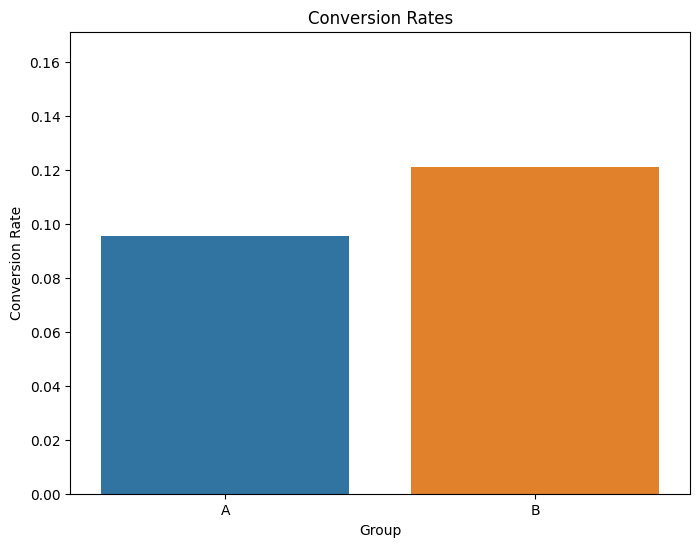

Sample Ratio Mismatch Detected!

--- Scenario 4: Unequal Conversion, SRM, Actual Ratio (A/(A+B)): 0.5000 ---
Scenario 4: Unequal Conversion and SRM
                  Metric         Value
0      Conversion Rate A        0.1018
1      Conversion Rate B        0.1506
2   P-value (Chi-Square)        1.0000
3  Sample Ratio Mismatch  Not Detected


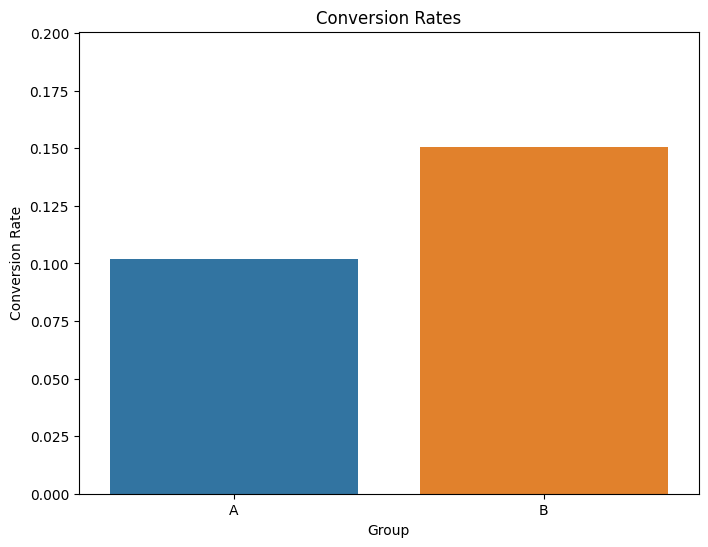

No significant Sample Ratio Mismatch detected.


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate A/B testing data with a sample ratio mismatch
def simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='none'):
    """
    Simulates A/B testing data, potentially with a sample ratio mismatch.

    Args:
        total_users: The total number of users in the experiment.
        expected_ratio: The expected proportion of users in the control group (A).
        conversion_rate_A: The conversion rate for the control group (A).
        conversion_rate_B: The conversion rate for the test group (B).
        srm_type: Type of sample ratio mismatch ('none', 'A_higher', 'B_higher').

    Returns:
        A Pandas DataFrame with the simulated data, including a 'group' column ('A' or 'B')
        and a 'converted' column (True or False).  Also returns the actual ratio.
    """
    # Calculate the number of users in each group based on the expected ratio
    num_users_A = int(total_users * expected_ratio)
    num_users_B = total_users - num_users_A

    # Simulate group assignment, potentially with a mismatch
    if srm_type == 'A_higher':
        num_users_A = int(total_users * (expected_ratio + 0.1))  # Shift 10% to A
        num_users_B = total_users - num_users_A
    elif srm_type == 'B_higher':
        num_users_B = int(total_users * (1 - expected_ratio + 0.1))  # Shift 10% to B
        num_users_A = total_users - num_users_B

    group_A = ['A'] * num_users_A
    group_B = ['B'] * num_users_B
    group = group_A + group_B

    # Simulate conversions based on the given conversion rates
    converted_A = np.random.rand(num_users_A) < conversion_rate_A
    converted_B = np.random.rand(num_users_B) < conversion_rate_B
    converted = np.concatenate((converted_A, converted_B))

    # Create the DataFrame
    data = pd.DataFrame({'group': group, 'converted': converted})
    actual_ratio = num_users_A / total_users
    return data, actual_ratio

def analyze_ab_test(data, title="A/B Test Analysis"):
    """
    Analyzes A/B testing data to check for a significant difference in conversion rates
    and performs a Chi-Square test for sample ratio mismatch.  Also plots the results.

    Args:
        data: A Pandas DataFrame with 'group' and 'converted' columns.
        title: Title of the analysis
    Returns:
        Prints the conversion rates for each group, the p-value of the Chi-Square test,
        and a message indicating whether a sample ratio mismatch is detected.
        Also displays a bar chart of conversion rates and a table of the data.
    """
    # Calculate conversion rates for each group
    conversion_rate_A = data[data['group'] == 'A']['converted'].mean()
    conversion_rate_B = data[data['group'] == 'B']['converted'].mean()

    # Perform Chi-Square test for sample ratio mismatch
    observed_A = len(data[data['group'] == 'A'])
    observed_B = len(data[data['group'] == 'B'])
    total_users = len(data)
    expected_ratio = 0.5  # Assuming a 50/50 split for a standard A/B test
    expected_A = total_users * expected_ratio
    expected_B = total_users * (1 - expected_ratio)
    observed = np.array([observed_A, observed_B])
    expected = np.array([expected_A, expected_B])
    chi2, p_value = chisquare(observed, expected)

    alpha = 0.05  # Significance level

    # Create a table of the results
    results_table = pd.DataFrame({
        'Metric': ['Conversion Rate A', 'Conversion Rate B', 'P-value (Chi-Square)', 'Sample Ratio Mismatch'],
        'Value': [f"{conversion_rate_A:.4f}", f"{conversion_rate_B:.4f}", f"{p_value:.4f}", "Detected" if p_value < alpha else "Not Detected"]
    })
    print(title)
    print(results_table) # Print the table

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['A', 'B'], y=[conversion_rate_A, conversion_rate_B])
    plt.title('Conversion Rates')
    plt.xlabel('Group')
    plt.ylabel('Conversion Rate')
    plt.ylim(0, max(conversion_rate_A, conversion_rate_B) + 0.05)  # Add some padding to the y-axis
    plt.show()

    if p_value < alpha:
        print("Sample Ratio Mismatch Detected!")
    else:
        print("No significant Sample Ratio Mismatch detected.")
    return results_table # Return the table

# Example usage:
total_users = 10000
expected_ratio = 0.5  # Intended 50/50 split
conversion_rate_A = 0.10
conversion_rate_B = 0.12

# Scenario 1: No Sample Ratio Mismatch
data_no_srm, actual_ratio_no_srm = simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='none')
print(f"\n--- Scenario 1: No SRM, Actual Ratio (A/(A+B)): {actual_ratio_no_srm:.4f} ---")
table_no_srm = analyze_ab_test(data_no_srm, title="Scenario 1: No SRM")


# Scenario 2: Sample Ratio Mismatch - Group A has higher proportion
data_A_higher, actual_ratio_A_higher = simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='A_higher')
print(f"\n--- Scenario 2: SRM, Group A Higher, Actual Ratio (A/(A+B)): {actual_ratio_A_higher:.4f} ---")
table_a_higher = analyze_ab_test(data_A_higher, title="Scenario 2: SRM - Group A Higher")


# Scenario 3: Sample Ratio Mismatch - Group B has higher proportion
data_B_higher, actual_ratio_B_higher = simulate_ab_test(total_users, expected_ratio, conversion_rate_A, conversion_rate_B, srm_type='B_higher')
print(f"\n--- Scenario 3: SRM, Group B Higher, Actual Ratio (A/(A+B)): {actual_ratio_B_higher:.4f} ---")
table_b_higher = analyze_ab_test(data_B_higher, title="Scenario 3: SRM - Group B Higher")

# Scenario 4: Unequal conversion rates and SRM
data_unequal_conv, actual_ratio_unequal_conv = simulate_ab_test(total_users, 0.4, 0.10, 0.15, srm_type='A_higher')
print(f"\n--- Scenario 4: Unequal Conversion, SRM, Actual Ratio (A/(A+B)): {actual_ratio_unequal_conv:.4f} ---")
table_unequal_conv = analyze_ab_test(data_unequal_conv, title="Scenario 4: Unequal Conversion and SRM")
